In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import numpy as np
import pandas as pd

import networkx as nx

from sklearn.model_selection import train_test_split

# Users

In [31]:
users = pd.read_csv('data/users.csv', index_col='user_id', parse_dates=['joinedAt'])
users.head()

,locale,birthyear,gender,joinedAt,location,timezone
user_id,,,,,,
3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [44]:
users.gender.value_counts()

male      23242
female    14858
Name: gender, dtype: int64

In [66]:
users[['birthyear', 'gender']].groupby('birthyear').agg({'gender': 
                                                         {'male': (lambda x: x.value_counts().loc['male']), 
                                                          'female': (lambda x: x.value_counts().loc['female'])}})

KeyError: 'the label [male] is not in the [index]'

In [33]:
vtype(users['joinedAt'].iloc[0])

str

# Users friends

In [5]:
user_friends = pd.read_csv('data/user_friends.csv', index_col='user')
user_friends.head()

,friends
user,
3197468391,1346449342 3873244116 4226080662 1222907620 54...
3537982273,1491560444 395798035 2036380346 899375619 3534...
823183725,1484954627 1950387873 1652977611 4185960823 42...
1872223848,83361640 723814682 557944478 1724049724 253059...
3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [6]:
user_friends.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38202 entries, 3197468391 to 54820382
Data columns (total 1 columns):
friends    38063 non-null object
dtypes: object(1)
memory usage: 596.9+ KB


In [8]:
user_friends['friends'] = user_friends['friends'].apply(lambda x: [int(x) for x in x.split()] 
                                                        if x is not np.nan else [])
user_friends['counts'] = [len(x) for x in user_friends['friends']]
user_friends.describe()

,counts
count,38202.000000
mean,795.413931
std,922.118197
min,0.000000
25%,174.000000
50%,481.000000
75%,1058.750000
max,4964.000000


In [8]:
if 1 == 0:
    plt.figure(figsize=(20, 14))

    G = nx.Graph()

    G.add_nodes_from(list(users.index.values))

    i = 0
    for user_id, row in user_friends.iterrows():
        friend_ids = [int(s_id) for s_id in row['friends'].split()]
        G.add_edges_from([(user_id, friend_id) for friend_id in friend_ids], color='blue')
        i += 1
        if i == 100:
            break

    nx.draw(G)

    plt.savefig('data/graph.png')

# Events

In [9]:
events = pd.read_csv('data/events.csv', index_col='event_id')
events.head()

,user_id,start_time,city,state,zip,country,lat,lng,c_1,c_2,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
event_id,,,,,,,,,,,,,,,,,,,,,
684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,0,...,0,1,0,0,0,0,0,0,0,9
244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,0,...,0,0,0,0,0,0,0,0,0,7
3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,12
2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,8
1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,9


In [26]:
events.shape[0]

3137972

In [12]:
event_attendees = pd.read_csv('data/event_attendees.csv', index_col='event')
event_attendees.head()

,yes,maybe,invited,no
event,,,,
1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
2621578336,NaN,NaN,NaN,NaN
855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


# Train

In [13]:
train = pd.read_csv('data/train.csv')
train.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [14]:
print('Размер обучающей выборки: ', train.shape[0])

Размер обучающей выборки:  15398


### Как распределено число событий, которым пользователь поставил отметку?
### Есть ли особо активные пользователи?

In [15]:
event_count_per_user = (train[['user', 'event']]
                        .groupby('user')
                        .count())

print('Самые активные пользователи')
print(event_count_per_user.sort('event', ascending=False)[:10])
print('\n\nСамые неактивные пользователи:')
print(event_count_per_user.sort('event', ascending=True)[:10])

Самые активные пользователи
            event
user             
2903662804     91
3514195773     55
1067164735     49
3943175229     49
3180412264     48
3835637004     46
4075466480     45
3406326706     41
2895220130     37
3834655845     35


Самые неактивные пользователи:
            event
user             
3554343061      4
645414373       4
61814256        4
2086869786      4
630652349       4
236194065       4
2501052021      4
4181452333      4
4180930546      4
1127657981      4


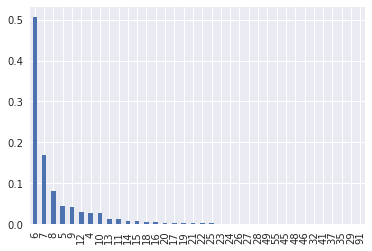

In [16]:
event_dist = event_count_per_user['event'].value_counts(normalize=True)
event_dist.plot(kind='bar')

### Как распределено число пользователей, поставивших отметку событию?
### Есть ли особо популярные события?

In [17]:
user_count_per_event = (train[['user', 'event']]
                        .groupby('event')
                        .count())

print('Популярные события:')
print(user_count_per_event.sort('user', ascending=False)[:10])
print('\n\nНепопулярные события:')
print(user_count_per_event.sort('user', ascending=True)[:10])

Популярные события:
            user
event           
955398943    242
2007279414   196
2529072432   187
1269035551   147
1600413013   114
1390707377    99
1076364848    98
1532377761    96
2149464820    89
268233790     80


Непопулярные события:
            user
event           
104070         1
2708587571     1
2708243586     1
2707138548     1
2706889282     1
2705882453     1
2705765590     1
2705316616     1
2704376528     1
2704261655     1


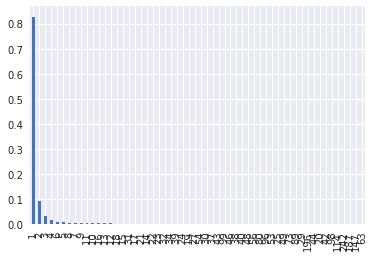

In [18]:
user_dist = user_count_per_event['user'].value_counts(normalize=True)
user_dist.plot(kind='bar')

### Сколько в выборке событий с отметкой interested? с отметкой not interested? без отметок?

In [20]:
counts = pd.DataFrame({'y': train['interested'] - train['not_interested'], 'count': 1}, train.index)
counts.groupby('y').count()

,count
y,
-1,514
0,10753
1,4131


### Train and valid

In [23]:
y = counts['y']

x_train, x_valid, y_train, y_valid = train_test_split(train[['user', 'event', 'invited', 'timestamp']], 
                                                      y, 
                                                      test_size=0.3)
print(x_train.shape[0], x_valid.shape[0])

10778 4620


# Test

In [48]:
test = pd.read_csv('data/test.csv')
test.head()

,user,event,invited,timestamp
0,1776192,2877501688,0,2012-11-30 11:39:01.230000+00:00
1,1776192,3025444328,0,2012-11-30 11:39:01.230000+00:00
2,1776192,4078218285,0,2012-11-30 11:39:01.230000+00:00
3,1776192,1024025121,0,2012-11-30 11:39:01.230000+00:00
4,1776192,2972428928,0,2012-11-30 11:39:21.985000+00:00


In [49]:
print('Размер тестовой выборки: ', test.shape[0])

Размер тестовой выборки:  10237
